# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation
from logistic_regression import LogisticRegression

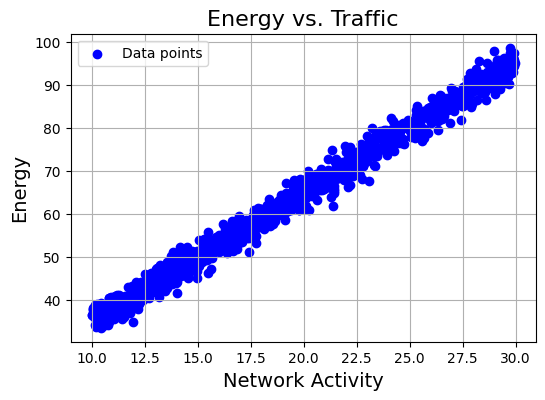

In [4]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

model = lr.predict(data['Net_Activity'])

A good estimate for the equation would be: y = 3.0063 * x + 4.9408


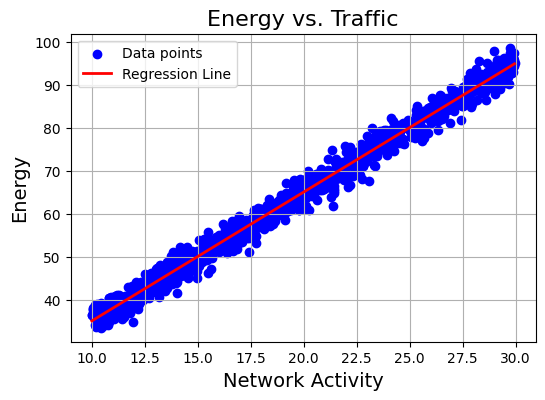

In [6]:
X = data['Net_Activity'].values

x_range = np.linspace(X.min(), X.max(),1000)
y_pred = lr.predict(x_range)

# print('Weight: ',lr.weights[0], 'Bias: ',lr.bias)
# print('Et godt uttrykk for Energy Consumption er: ',round(lr.weights[0],4),'* x +',round(lr.bias,4))

Y_min = data['Energy'].min()
Y_max = data['Energy'].max()

lr.printExpressions(y_pred[0],y_pred[-1])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(x_range, y_pred, c='red', label='Regression Line', linewidth=2)
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


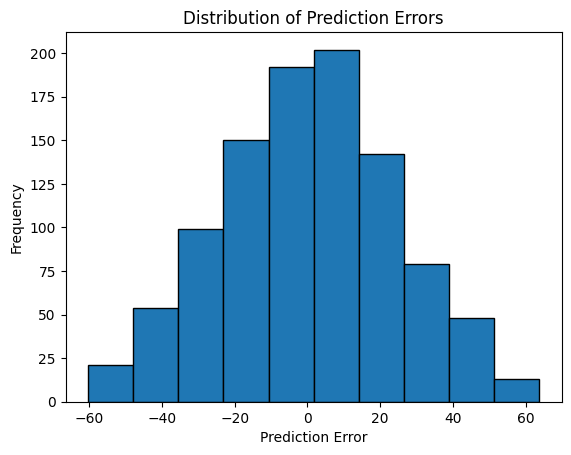

The average error is:  0.1462672001907622


In [7]:
error = data['Energy'] - y_pred

plt.hist(error, bins=10, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

print('The average error is: ',np.mean(error))


Question 2b:
As we can see in the above graph, the error seems to be on the smaller side. Considering that we are seeing a approximate bell-curve (normalfordeling), we can assume that our linear-regression model is performing well since this is expected. There are however some outliers in the plus/minus 60 areas, so there are room for improvement.

An unbiased estimator would be an estimator which has a expected estimation-error set as zero. This means that, in the long run, if one uses the estimator to make many estimates, the average of these estimated values will approach the true value of the parameter being estimated.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [9]:
#Model training
X = train[['x0', 'x1']]
y = train['y']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(learning_rate=0.1, epochs=10000,degree=10,threshold=0.5)  
model.fit(X_scaled, y)


In [10]:
#Predictions
X_test = test[['x0', 'x1']]
X_test_scaled = scaler.transform(X_test) 

y_pred = model.predict(X_test_scaled)

In [11]:
#Find accuracy
accuracy = np.mean(y_pred == test['y'].values)
print(accuracy)

0.882


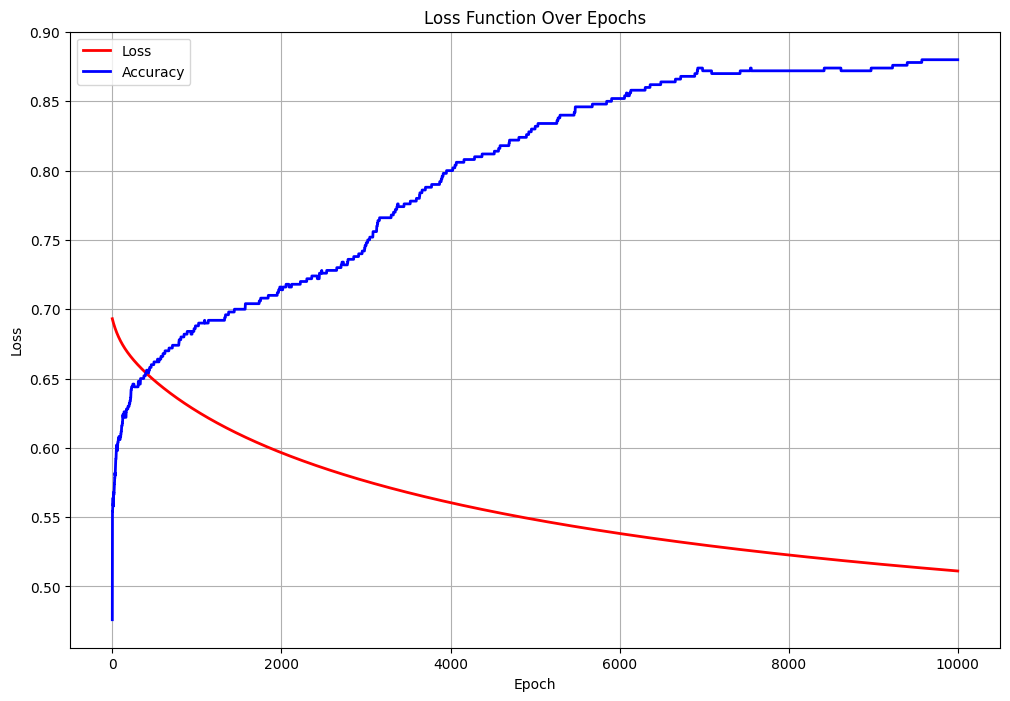

In [12]:
#Plot loss vs accuracy over epochs
plt.figure(figsize=(12, 8))
plt.plot(model.losses, c='red', label='Loss', linewidth=2)
plt.plot(model.accuracies, c='blue', label='Accuracy', linewidth=2)
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


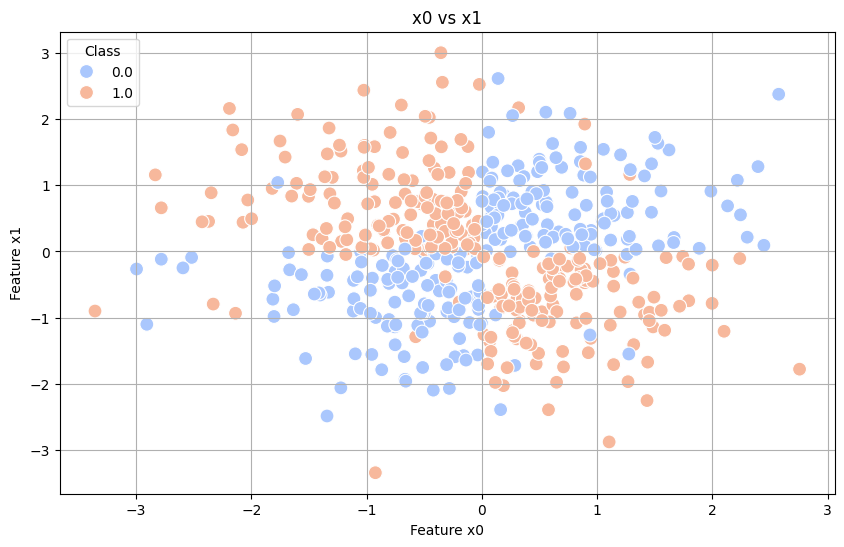

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='x0', y='x1', hue='y', palette='coolwarm', edgecolor='w', s=100)
plt.title('x0 vs x1')
plt.xlabel('Feature x0')
plt.ylabel('Feature x1')
plt.legend(title='Class')
plt.grid(True)
plt.show()


a) The initial poor performance was about 0.434 accuracy, I thought this occured as a consequence of the data beeing divided into 'two parts' as shown in the above graph. This means that a logreg model will try to make a line adjust into this without really being able to fit the whole dataset. The solution seems to be to take advantage of the sklearn.polynomialfeatures library, and make the data into polynomials. This made a much better result, 0.92 with 1M epochs and a learning rate of 0.01, which is adequate for this model.

b) Induction Bias means that each model has a implicit assumption that the data you feed it is on a 'correct' form, meaning that if a linear model is fed non-linear data it wont be able to compute very efficiently. This tasks model is a logistic regression, meaning it expecrs linear data which is then transformed via the sigmoid function. As explained in the last task, the data here is not linear AT ALL. This makes it extremely hard for the model to predict anything useful at all, which is why the model performed worse than a random guess.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth=10000, random_state=1000)
tree_model.fit(X, y)

y_pred_tree = tree_model.predict(X_test)

accuracy = accuracy_score(test['y'].values, y_pred_tree)
print(f"Accuracy: {accuracy}")


Accuracy: 0.874


c) In the above code I solved the task with DecisionTreeClassifier as instructed. I did find the code itself quite alot easier, however there seems to be a accuracy drop the further we let the tree 'grow'. With the depth set to 10K I got an accuracy of 0.87, which is less than the logreg code and the required performance for the task. It did however perform good with a 3 node tree. I think the decision tree performs good here is because of the way the data is given. The tree doesn't care if there is a linear relationship in the data, it just splits in into subsets and looks at the interactions this again produces.
   
d) Plot of ROC curve is beneath.

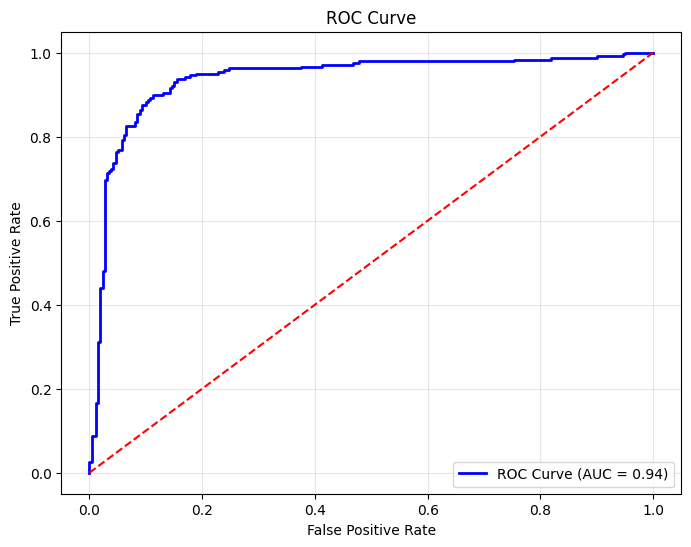

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.roc_predict(X_test_scaled)

fpr, tpr, thresholds = roc_curve(test['y'].values, y_pred)

auc = roc_auc_score(test['y'].values, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [16]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [17]:
# sns.pairplot(train, hue='target',vars=['data_stream_'+str(i) for i in range(11)],diag_kind='kde')
# plt.show()

In [18]:
numeric_columns = train.select_dtypes(include=[np.number]).columns

z_scores = np.abs((train[numeric_columns] - train[numeric_columns].mean()) / train[numeric_columns].std())
threshold = 3

anomalies_per_column = (z_scores > threshold).sum()

most_anomalous_column = anomalies_per_column.idxmax()
most_anomalous_count = anomalies_per_column.max()

print(f"The column with the most anomalies is: {most_anomalous_column}")
print(f"Number of anomalies in this column: {most_anomalous_count}")

#FOR TESTING PURPOSES
most_anomalous_column = 'data_stream_3'

#print(train[most_anomalous_column])

The column with the most anomalies is: data_stream_7
Number of anomalies in this column: 66


In [19]:
from sklearn.preprocessing import PolynomialFeatures

#Decrypt the data functions

"TRAINING"
train[most_anomalous_column] = (train[most_anomalous_column] * 1000) % 2 #Decrypt possibly bad data

x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]


if y_train.dtype == 'float' or y_train.dtype == 'int':
    y_train = pd.cut(y_train, bins=2, labels=[0, 1])

"TESTING"
test[most_anomalous_column] = (test[most_anomalous_column] * 1000) % 2  # Decrypt for testing as well

x_test = test.iloc[:, :-1]  
y_test = test.iloc[:, -1]   


In [20]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)


model_3.fit(x_train, y_train)
#print(x_train.head(10))


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       random_state=42)

In [21]:
y_pred = model_3.predict(x_test)
y_pred_probability = model_3.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

roc_auc = roc_auc_score(y_test, y_pred_probability)
print(f"ROC AUC Score: {round(roc_auc,2)}")

Accuracy: 0.6075
ROC AUC Score: 0.72


a)

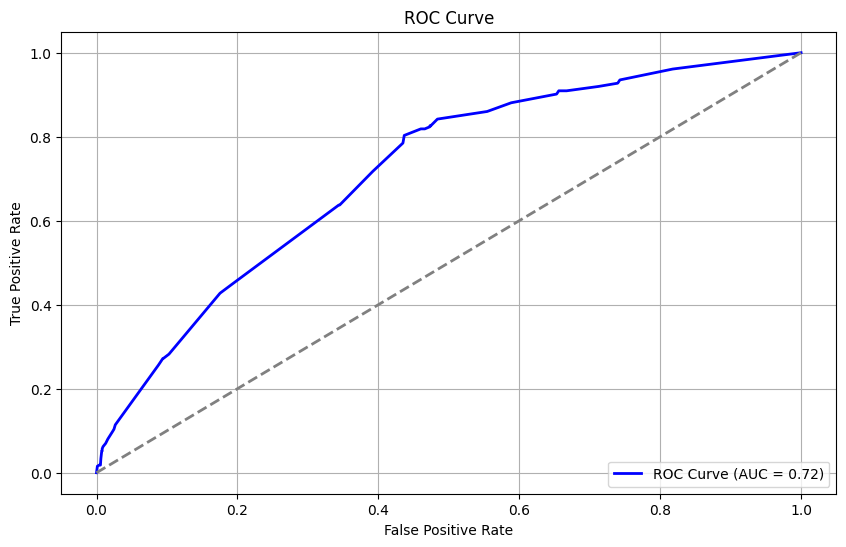

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {round(roc_auc,2)})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


a. Breaking the threshold involved several strategies, at first I didn't know how I could plot the data in a useful manner so I only worked with accuracy and roc auc for some time. After finally finding a way to plot with Seaborn I saw that 'data_stream_3' seemed a bit peculiar compared to the others, and decided that this must be the data with encryption. I decrypted using the tips given on BlackBoard and got a ROC AUC rounded to 0.72. I did not change a lot on the hyperparameters, from the beginning it was quite obvious the model would only be worse after adjusting the depth more than 7. I did find that Entropy worked a bit better than Gini, and thus went with that instead.

b) justify roc auc usage


c) Code beneath demonstrates how RandomForestClassifier could solve the problem on the same dataset. Random Forest gives a 1.5% increase in ROC AUC and about the same accuracy. These are however on the same hyperparameters as DecisionTreeClassifier, adjusting them a bit here grants a bit better accuracy and a tad bit better ROC AUC.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=7,       # Adjust depth similar to the decision tree for consistency
    min_samples_split=4,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
y_pred_probability = rf_model.predict_proba(x_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Random Forest: {accuracy}")

roc_auc = roc_auc_score(y_test, y_pred_probability)
print(f"ROC AUC Score with Random Forest: {roc_auc}")


Accuracy with Random Forest: 0.622
ROC AUC Score with Random Forest: 0.7269198913650635



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [24]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

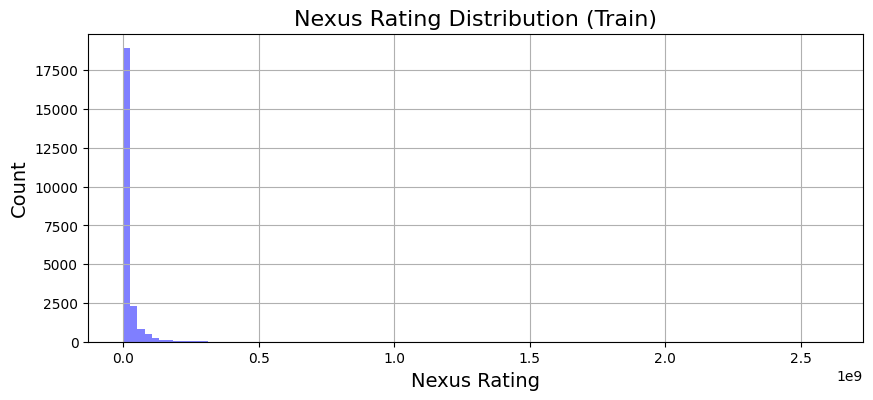

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [26]:
""""
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preprocessing: Handling missing values and preparing features
# Selecting features and target variable from the training set
features_train = train.drop(columns=['nexus_rating'])
target_train = train['nexus_rating']

# Handling missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_train_imputed = imputer.fit_transform(features_train)

# Standardizing the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_imputed)

# Apply the same preprocessing steps to the test set
features_test = test.drop(columns=['nexus_rating'])
features_test_imputed = imputer.transform(features_test)  # Use the same imputer trained on training data
features_test_scaled = scaler.transform(features_test_imputed)  # Use the same scaler trained on training data

# Extracting the target variable from the test set
target_test = test['nexus_rating']

# Implementing the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     random_state=42,
                                     max_depth=8,
                                     )


rf_regressor.fit(features_train_scaled, target_train)

# Making predictions on the test set
test['pred'] = rf_regressor.predict(features_test_scaled)
"""

'"\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# Data preprocessing: Handling missing values and preparing features\n# Selecting features and target variable from the training set\nfeatures_train = train.drop(columns=[\'nexus_rating\'])\ntarget_train = train[\'nexus_rating\']\n\n# Handling missing values with SimpleImputer\nimputer = SimpleImputer(strategy=\'mean\')\nfeatures_train_imputed = imputer.fit_transform(features_train)\n\n# Standardizing the features\nscaler = StandardScaler()\nfeatures_train_scaled = scaler.fit_transform(features_train_imputed)\n\n# Apply the same preprocessing steps to the test set\nfeatures_test = test.drop(columns=[\'nexus_rating\'])\nfeatures_test_imputed = imputer.transform(features_test)  # Use the same imputer trained on training data\nfeatures_test_scaled = scaler.transfor

In [27]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and prepare the dataset
df = pd.read_csv('final_mission_train.csv', header=None)

# 3. Assign column names (you may need to adjust these based on actual feature meanings)
df.columns = [
    'feature_1', 'nexus_rating', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
    'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
    'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17'
]

# 4. Handling missing values
df = df.dropna(subset=['nexus_rating'])
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# 5. Handling categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 6. Transforming 'nexus_rating'
df['nexus_rating_log'] = np.log1p(df['nexus_rating'])

# 7. Splitting the data
X = df.drop(['nexus_rating', 'nexus_rating_log'], axis=1)
y = df['nexus_rating_log']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Model Building - Initialize models
gbr = GradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
xgbr = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Train models
gbr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

# 9. Model Evaluation - RMSLE Calculation
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Predictions
y_pred_gbr = gbr.predict(X_valid)
y_pred_rfr = rfr.predict(X_valid)
y_pred_xgbr = xgbr.predict(X_valid)

# Inverse transform predictions
y_valid_exp = np.expm1(y_valid)
y_pred_gbr_exp = np.expm1(y_pred_gbr)
y_pred_rfr_exp = np.expm1(y_pred_rfr)
y_pred_xgbr_exp = np.expm1(y_pred_xgbr)

# Calculate RMSLE
rmsle_gbr = rmsle(y_valid_exp, y_pred_gbr_exp)
rmsle_rfr = rmsle(y_valid_exp, y_pred_rfr_exp)
rmsle_xgbr = rmsle(y_valid_exp, y_pred_xgbr_exp)

print(f'RMSLE GradientBoostingRegressor: {rmsle_gbr}')
print(f'RMSLE RandomForestRegressor: {rmsle_rfr}')
print(f'RMSLE XGBoostRegressor: {rmsle_xgbr}')

# 10. Ensembling Techniques - Simple averaging ensemble
y_pred_ensemble_exp = (y_pred_gbr_exp + y_pred_rfr_exp + y_pred_xgbr_exp) / 3

# Calculate RMSLE for ensemble
rmsle_ensemble = rmsle(y_valid_exp, y_pred_ensemble_exp)
print(f'RMSLE Ensemble Model: {rmsle_ensemble}')

# 11. Hyperparameter Tuning with RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

random_search = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_log_error',
    random_state=42
)

random_search.fit(X_train, y_train)

# Best estimator
best_xgbr = random_search.best_estimator_

# Evaluate the tuned model
y_pred_best_xgbr = best_xgbr.predict(X_valid)
y_pred_best_xgbr_exp = np.expm1(y_pred_best_xgbr)
rmsle_best_xgbr = rmsle(y_valid_exp, y_pred_best_xgbr_exp)
print(f'RMSLE Best XGBoostRegressor: {rmsle_best_xgbr}')

# 12. Feature Importance Plotting
importances = best_xgbr.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort values
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

# 13. Final Model Prediction on Test Set
test_df = pd.read_csv('final_mission_test.csv', header=None)
test_df.columns = [...]  # Assign the same column names
# Apply the same preprocessing steps as before

# Make predictions
test_predictions_log = best_xgbr.predict(test_df)
test_predictions = np.expm1(test_predictions_log)

# Save predictions
submission = pd.DataFrame({'Id': test_df.index, 'nexus_rating': test_predictions})
submission.to_csv('submission.csv', index=False)


C:\Users\Jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Cross-Validation MSE Scores: [0.10208725 0.0987314  0.10196113 0.09948469 0.09290036]
Average CV MSE: 0.09903296505130729


In [28]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

#print('RMSLE: ',round(rmsle(target_test, test['pred']),4))

# Assuming your custom RMSLE function is already defined
actual_rmsle = rmsle(y_true, y_pred)
print(actual_rmsle)

11.624656218811015


In [29]:
def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [30]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
